In [53]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Basic
file = uproot.open('uproot-tutorial-file.root')
print("file:", file)
print("keys:", file.keys())
print("classnames:", file.classnames())
print(file['Events'])

file: <ReadOnlyDirectory '/' at 0x7fb63037dc40>
keys: ['Events;1']
classnames: {'Events;1': 'TTree'}
<TTree 'Events' (6 branches) at 0x7fb630aa7b20>


In [41]:
# Trees
tree = file['Events']
print(tree.keys())
print(tree.arrays())
print(tree.arrays()[10])
print(tree.arrays()[20])

# Branches
branches = tree.arrays()
print(type(branches))
print(branches[0])          # ugly print
print(branches[0].tolist())
print(branches['nMuon'])
print(type(branches['nMuon']))
print(branches['Muon_pt'])

# Event
print(branches['Muon_pt'][0])
for i in range(10):
    print(branches['Muon_pt'][i])

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']
[{nMuon: 2, Muon_pt: [10.8, 15.7], Muon_eta: [1.07, ...], ...}, ..., {...}]
{nMuon: 2, Muon_pt: [8.82, 17.6], Muon_eta: [1.65, ...], Muon_phi: [...], ...}
{nMuon: 2, Muon_pt: [3.44, 12.8], Muon_eta: [2.14, ...], Muon_phi: [...], ...}
<class 'awkward.highlevel.Array'>
{nMuon: 2, Muon_pt: [10.8, 15.7], Muon_eta: [1.07, ...], Muon_phi: [...], ...}
{'nMuon': 2, 'Muon_pt': [10.763696670532227, 15.736522674560547], 'Muon_eta': [1.0668272972106934, -0.563786506652832], 'Muon_phi': [-0.03427272289991379, 2.5426154136657715], 'Muon_mass': [0.10565836727619171, 0.10565836727619171], 'Muon_charge': [-1, -1]}
[2, 2, 1, 4, 4, 3, 2, 2, 2, 2, 2, 2, 6, ..., 5, 2, 1, 3, 2, 1, 0, 3, 2, 3, 2, 3]
<class 'awkward.highlevel.Array'>
[[10.8, 15.7], [10.5, 16.3], [3.28], ..., [3.31, 15.7], [11.4, 3.08, 4.97]]
[10.8, 15.7]
[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3,

(array([8.7359e+04, 1.2253e+04, 3.5600e+02, 2.8000e+01, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

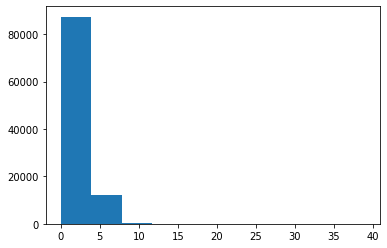

In [26]:
plt.hist(branches['nMuon'])

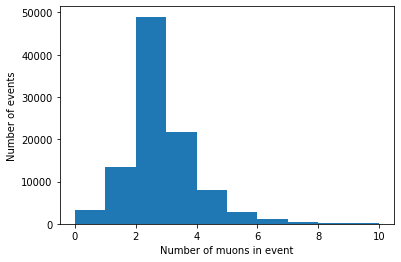

In [31]:
# Plotting
plt.hist(branches['nMuon'], bins=10, range=(0, 10))
plt.xlabel('Number of muons in event')
plt.ylabel('Number of events')
plt.show()

In [ ]:
# Math operation
#print("mean:", np.mean(branches['nMuon']))
#print("std:", np.std(branches['nMuon']))
#print("max:", np.min(branches['nMuon']))
#print("min:", np.max(branches['nMuon']))
#np.std(branches['nMuon'])
#ak.mean(branches['nMuon'])

ak.flatten(branches['Muon_pt'])
branches['Muon_pt']


[10.8, 15.7, 10.5, 16.3, 3.28, 11.4, ..., 5.09, 3.31, 15.7, 11.4, 3.08, 4.97]
[[10.8, 15.7], [10.5, 16.3], [3.28], ..., [3.31, 15.7], [11.4, 3.08, 4.97]]


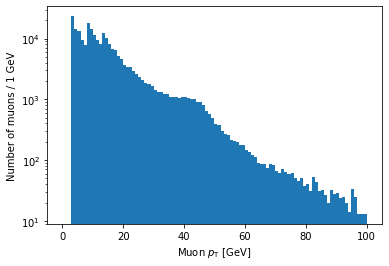

In [63]:
# Log scale plotting
print(ak.flatten(branches['Muon_pt']))
print(branches['Muon_pt'])

plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.yscale('log')
plt.show()

In [64]:
# Counting
print(len(branches))
print(len(branches['nMuon']))
print(len(branches['Muon_pt']))  # or any of the other branches...)




100000
100000
100000
